In [6]:
from functions import *
from methods import *
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
path = '/Users/irashokar/documents/NOvA/files/Feb_test/both_50/'
with open(path + 'history_SGD_both_50_equal_weights.pkl','rb') as f1:
    history = pkl.load(f1)

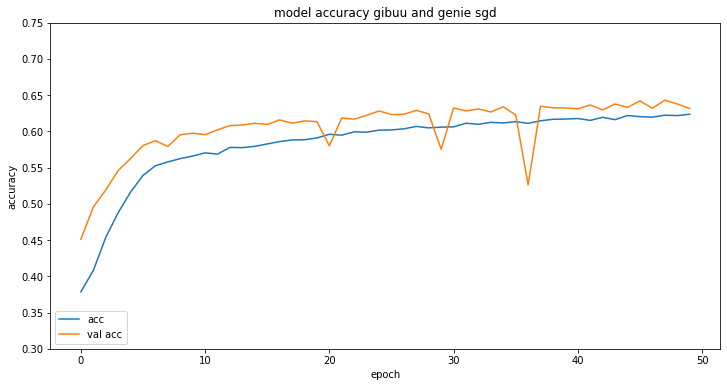

In [8]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy gibuu and genie sgd')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val acc'], loc='lower left')
plt.ylim(0.3,0.75)
plt.show()

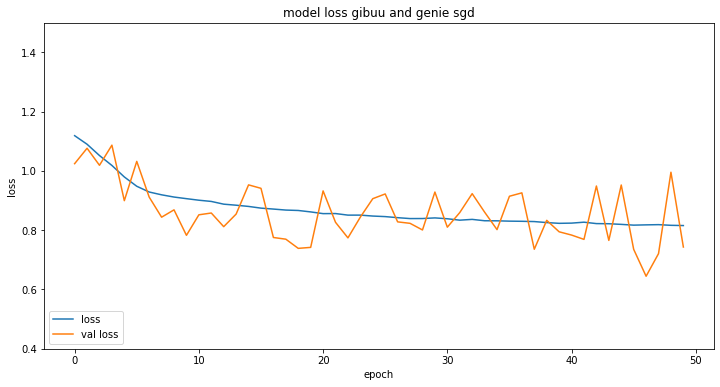

In [9]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss gibuu and genie sgd')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val loss'], loc='lower left')
plt.ylim(0.4,1.5)
plt.show()

In [10]:
with open(path+ 'both_probabilities_short_weights_SGD_both_50_equal_weights.pkl','rb') as f2:
    probabilities = pkl.load(f2)
print(len(probabilities))
with open(path+ 'both_test_labels_list_short_weights_SGD_both_50_equal_weights.pkl','rb') as f3:
    test_labels = pkl.load(f3)
print(len(test_labels))
with open(path+ 'both_test_weights_list_short_weights_SGD_both_50_equal_weights.pkl','rb') as f4:
    gibuu_weights = pkl.load(f4)


45184
45186


In [11]:
predictions = []
for i in probabilities:
    max_index =np.where(i == np.max(i))[0][0]
    predictions.append(max_index)
    
test_vals = []
for i in test_labels:
    max_index =np.where(i == np.max(i))[0][0]
    test_vals.append(max_index)
    
#accuracy
acc = 0
for i in range(len(probabilities)):
    if test_vals[i]==predictions[i]:
        acc+=1
    else:
        pass
acc/=len(test_vals)

true_val = probabilities

print('Probabilities: \n')
print('Accuracy:{} \n'.format(acc))
for i in range(10):
    print(probabilities[i], '\n')
print('Predictions: \n')
print(predictions[:10], '\n')
print('Truth labels: \n')
print(test_vals[:10])

Probabilities: 

Accuracy:0.6214535475589784 

[0.591797   0.21936832 0.1888347 ] 

[0.44585815 0.42921415 0.12492773] 

[0.33590746 0.39254338 0.27154917] 

[0.39476013 0.51227564 0.09296425] 

[0.06992462 0.0902866  0.8397888 ] 

[0.34806544 0.25329047 0.3986441 ] 

[0.00763399 0.00946481 0.9829012 ] 

[0.3654285  0.19925658 0.43531495] 

[0.4643733  0.37960625 0.15602045] 

[0.5742525  0.20440611 0.22134139] 

Predictions: 

[0, 0, 1, 1, 2, 2, 2, 2, 0, 0] 

Truth labels: 

[0, 1, 2, 0, 2, 2, 2, 2, 1, 0]


Text(0, 0.5, 'Count')

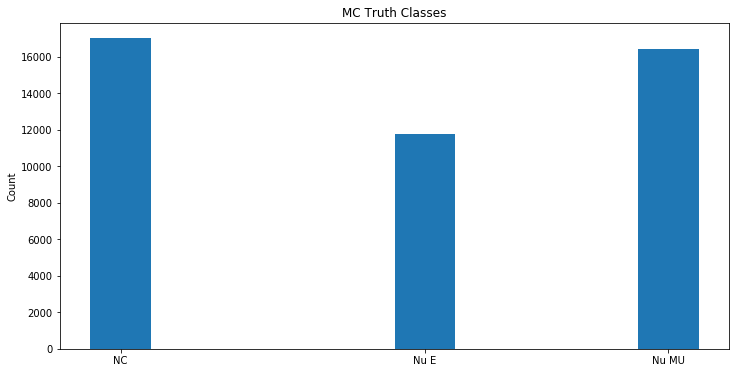

In [12]:
plt.figure(figsize=(12,6))
plt.hist(test_vals)
x = [0.1, 1.1, 1.9]
class_names = ['NC', 'Nu E', 'Nu MU']
plt.xticks(x, class_names)
plt.title('MC Truth Classes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

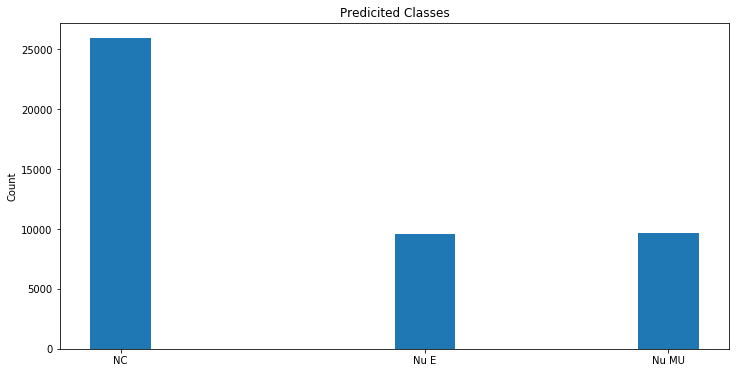

In [13]:
plt.figure(figsize=(12,6))
plt.hist(predictions)
x = [0.1, 1.1, 1.9]
class_names = ['NC', 'Nu E', 'Nu MU']
plt.xticks(x, class_names)
plt.title('Predicited Classes')
plt.ylabel('Count')

In [50]:
lis = []
for i in predictions:
    if i ==0:
        if random.random()>0.36:
            pass
        else:
            lis.append(i)
    elif i ==1:
        if random.random()>0.6:
            pass
        else:
            lis.append(i)
    else:
        lis.append(i)

Text(0, 0.5, 'Count')

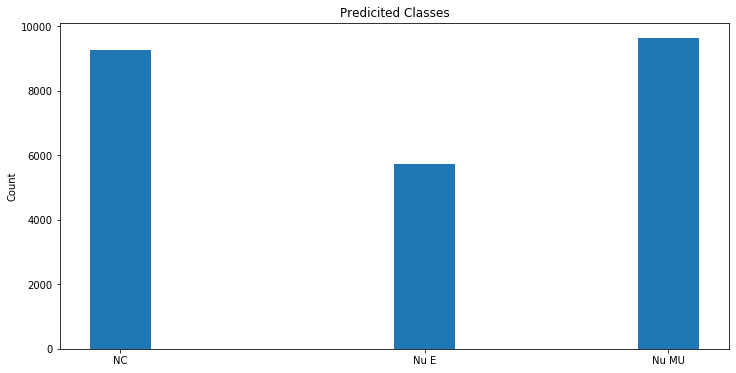

In [51]:
plt.figure(figsize=(12,6))
plt.hist(lis)
x = [0.1, 1.1, 1.9]
class_names = ['NC', 'Nu E', 'Nu MU']
plt.xticks(x, class_names)
plt.title('Predicited Classes')
plt.ylabel('Count')

[(0, 1)]

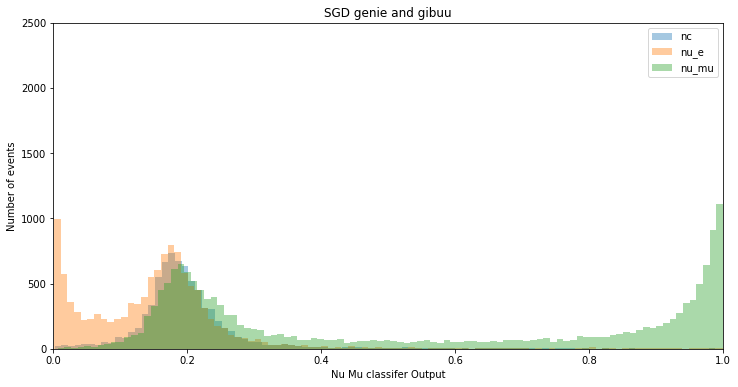

In [42]:
mu_e = []
nc = []
nu_mu = []
for i in range(len(probabilities)):
    if test_vals[i] ==0 and random.random()>0.56:
        nc.append(probabilities[i,2])
    elif test_vals[i] ==1:
        mu_e.append(probabilities[i,2])
    elif test_vals[i] ==2:
        nu_mu.append(probabilities[i,2])
        
plt.figure(figsize=(12,6))
g = sns.distplot(nc, bins = 100, kde=False)
g = sns.distplot(mu_e, bins = 100, kde=False)
g = sns.distplot(nu_mu, bins = 100, kde=False)
plt.legend(['nc', 'nu_e','nu_mu'], loc='upper right')
plt.xlabel('Nu Mu classifer Output')
plt.ylabel('Number of events')
plt.title('SGD genie and gibuu')
g.set(ylim=(0,2500))
g.set(xlim=(0,1))

[(0, 1)]

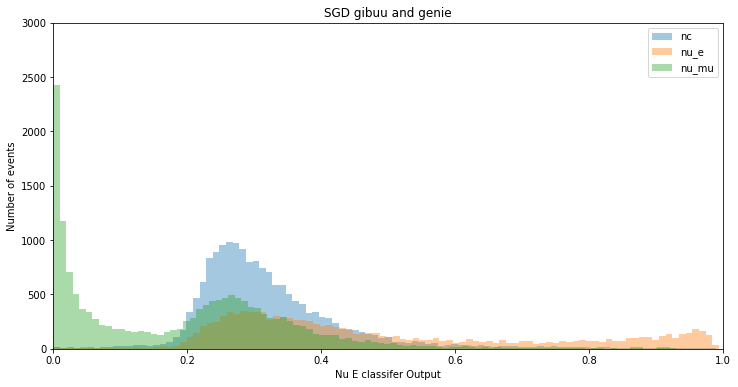

In [15]:
mu_e = []
nc = []
nu_mu = []
for i in range(len(probabilities)):
    if test_vals[i] ==0:
        nc.append(probabilities[i,1])
    elif test_vals[i] ==1:
        mu_e.append(probabilities[i,1])
    elif test_vals[i] ==2:
        nu_mu.append(probabilities[i,1])
        
plt.figure(figsize=(12,6))
g = sns.distplot(nc, bins = 100, kde=False)
g = sns.distplot(mu_e, bins = 100, kde=False)
g = sns.distplot(nu_mu, bins = 100, kde=False)
plt.legend(['nc', 'nu_e','nu_mu'], loc='upper right')
plt.xlabel('Nu E classifer Output')
plt.ylabel('Number of events')
plt.title('SGD gibuu and genie')
g.set(ylim=(0,3000))
g.set(xlim=(0,1))

[(0, 1)]

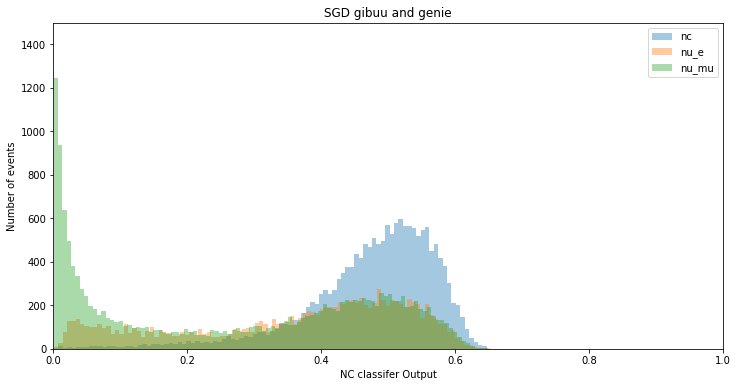

In [16]:
mu_e = []
nc = []
nu_mu = []
for i in range(len(probabilities)):
    if test_vals[i] ==0:
        nc.append(probabilities[i,0])
    elif test_vals[i] ==1:
        mu_e.append(probabilities[i,0])
    elif test_vals[i] ==2:
        nu_mu.append(probabilities[i,0])
        
plt.figure(figsize=(12,6))
g = sns.distplot(nc, bins = 100, kde=False)
g = sns.distplot(mu_e, bins = 100, kde=False)
g = sns.distplot(nu_mu, bins = 100, kde=False)
plt.legend(['nc', 'nu_e','nu_mu'], loc='upper right')
plt.xlabel('NC classifer Output')
plt.ylabel('Number of events')
plt.title('SGD gibuu and genie')
g.set(ylim=(0,1500))
g.set(xlim=(0,1))

In [17]:
purity_list = []
efficiency_list = []
p_x_e_list = []

gibuu_weights=[float(i) for i in gibuu_weights]
 
for j in np.arange(0, 0.99, 0.01):
    nu_mu_above = []
    nu_mu_below = []
    nc_above = []
    nc_below = []
    nu_e_above = []
    nu_e_below = []
    for i in range(len(probabilities)):
        if test_vals[i] ==2:
            if probabilities[i,2]>=j:
                nu_mu_above.append(probabilities[i,2]*gibuu_weights[i])
            elif probabilities[i,2]<=j:
                nu_mu_below.append(probabilities[i,2]*gibuu_weights[i])
                
        elif test_vals[i] ==0:         
            if probabilities[i,2]>=j:
                nc_above.append(probabilities[i,2]*gibuu_weights[i])
            elif probabilities[i,2]<=j:
                nc_below.append(probabilities[i,2]*gibuu_weights[i])
                
        elif test_vals[i] ==1:        
            if probabilities[i,2]>=j:
                nu_e_above.append(probabilities[i,2]*gibuu_weights[i])
            elif probabilities[i,2]<=j:
                nu_e_below.append(probabilities[i,2]*gibuu_weights[i])
                
        
                
    purity = len(nu_mu_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
    purity_list.append(purity)

    efficiency = len(nu_mu_above)/(len(nu_mu_above)+len(nu_mu_below))
    efficiency_list.append(efficiency)

    p_x_e_list.append(purity*efficiency)
    


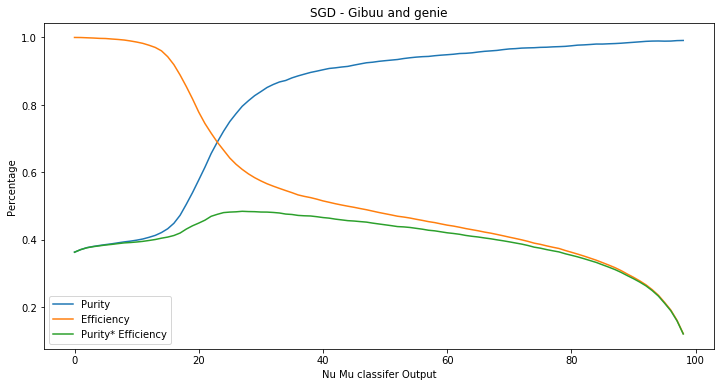

In [18]:
plt.figure(figsize=(12,6))
plt.plot(purity_list)
plt.plot(efficiency_list)
plt.plot(p_x_e_list)
plt.xlabel('Nu Mu classifer Output')
plt.ylabel('Percentage')
plt.title('SGD - Gibuu and genie')
plt.legend(['Purity', 'Efficiency', 'Purity* Efficiency'], loc='lower left')

In [19]:
purity_list = []
efficiency_list = []
p_x_e_list = []
 
for j in np.arange(0, 0.25, 0.01):
    nu_mu_above = []
    nu_mu_below = []
    nc_above = []
    nc_below = []
    nu_e_above = []
    nu_e_below = []
    for i in range(len(probabilities)):
        if test_vals[i] ==2:
            if probabilities[i,1]>=j:
                nu_mu_above.append(probabilities[i,1]*gibuu_weights[i])
            elif probabilities[i,1]<=j:
                nu_mu_below.append(probabilities[i,1]*gibuu_weights[i])
            
                
        elif test_vals[i] ==0:         
            if probabilities[i,1]>=j:
                nc_above.append(probabilities[i,1]*gibuu_weights[i])
            elif probabilities[i,1]<=j:
                nc_below.append(probabilities[i,1]*gibuu_weights[i])
            
                
        elif test_vals[i] ==1:        
            if probabilities[i,1]>=j:
                nu_e_above.append(probabilities[i,1]*gibuu_weights[i])
            elif probabilities[i,1]<=j:
                nu_e_below.append(probabilities[i,1]*gibuu_weights[i])
                
        
                
    purity = len(nu_e_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
    purity_list.append(purity)

    efficiency = len(nu_e_above)/(len(nu_e_above)+len(nu_e_below))
    efficiency_list.append(efficiency)

    p_x_e_list.append(purity*efficiency)
    

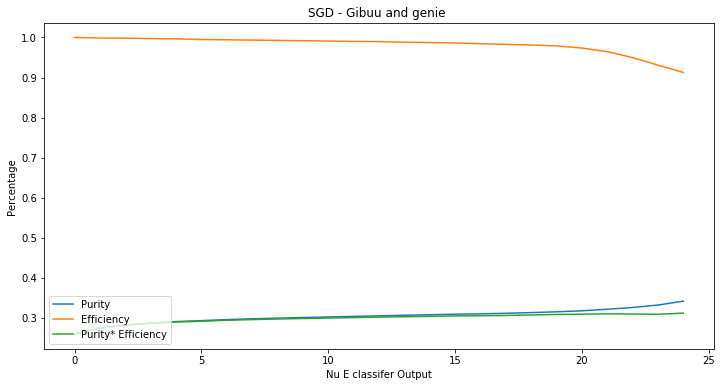

In [20]:
plt.figure(figsize=(12,6))
plt.plot(purity_list)
plt.plot(efficiency_list)
plt.plot(p_x_e_list)
plt.xlabel('Nu E classifer Output')
plt.ylabel('Percentage')
plt.title('SGD - Gibuu and genie ')
plt.legend(['Purity', 'Efficiency', 'Purity* Efficiency'], loc='lower left')

In [45]:
path = '/Users/irashokar/documents/NOvA/files/Feb_test/both_equal/'
with open(path+ 'nodes_values_weights_SGD_both_50_equal_weights.pkl','rb') as f2:
    node_values = pkl.load(f2)
print(len(node_values))
with open(path+ 'nodes_labels_weights_SGD_both_50_equal_weights.pkl','rb') as f3:
    node_test_labels = pkl.load(f3)
print(len(node_test_labels))
with open(path+ 'nodes_labels_weights_SGD_both_50_equal_weights.pkl','rb') as f3:
    node_test_labels = pkl.load(f3)
print(len(node_test_labels))

32
32


In [46]:
print('penultimate layer matrix:', '\n', node_values, '\n','\n','matrix shape:',  node_values.shape,'\n','\n',  'truth values:')
for i in node_test_labels:
    print(i)

penultimate layer matrix: 
 [[0.04089288 0.         0.         ... 0.         0.05105764 0.10509731]
 [0.0337562  0.         0.         ... 0.13890646 0.15775594 0.42279038]
 [0.         0.         0.         ... 0.16689183 0.15952648 0.3955806 ]
 ...
 [0.         0.         0.         ... 0.10334533 0.04351949 0.20328636]
 [0.         0.00462746 0.         ... 0.10641446 0.03974776 0.3866695 ]
 [0.         0.         0.00389753 ... 0.         0.28698525 0.        ]] 
 
 matrix shape: (32, 1024) 
 
 truth values:
[1, 0, 0]
[0, 0, 1]
[1, 0, 0]
[0, 0, 1]
[0, 0, 1]
[1, 0, 0]
[1, 0, 0]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[1, 0, 0]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[1, 0, 0]
[0, 1, 0]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[1, 0, 0]
[0, 0, 1]


Text(0, 0.5, 'Node Value')

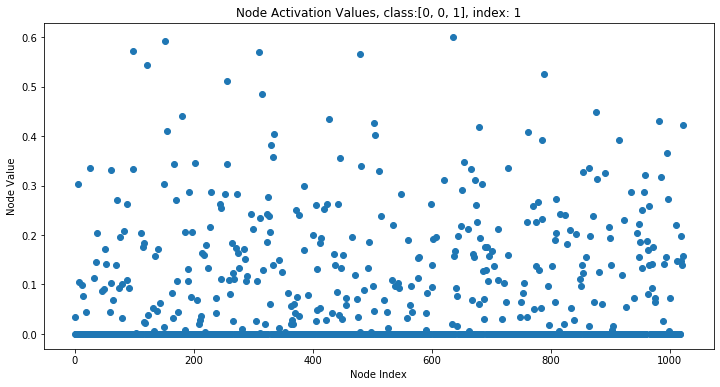

In [19]:
plt.figure(figsize=(12,6))
i = 1
plt.plot(node_values[i], 'o')
plt.title('Node Activation Values, class:{}, index: {}'.format(node_test_labels[i], i))
plt.xlabel('Node Index')
plt.ylabel('Node Value')

Text(0, 0.5, 'Node Value')

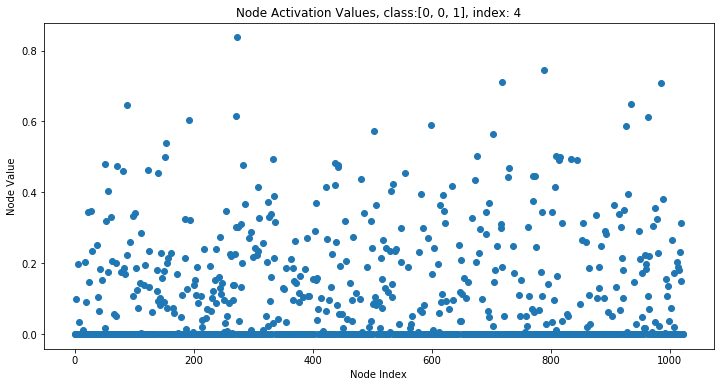

In [55]:
plt.figure(figsize=(12,6))
i = 4
plt.plot(node_values[i], 'o')
plt.title('Node Activation Values, class:{}, index: {}'.format(node_test_labels[i], i))
plt.xlabel('Node Index')
plt.ylabel('Node Value')

Text(0, 0.5, 'Node Value')

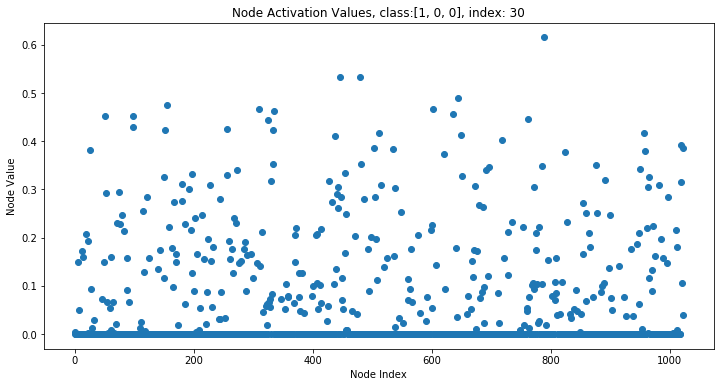

In [54]:
plt.figure(figsize=(12,6))
i = 30
plt.plot(node_values[i], 'o')
plt.title('Node Activation Values, class:{}, index: {}'.format(node_test_labels[i], i))
plt.xlabel('Node Index')
plt.ylabel('Node Value')

In [43]:
#classified as nu_mu
index_1 = [i for i in range(len(node_values[1])) if node_values[1,i]>=0.3]
index_2 = [i for i in range(len(node_values[4])) if node_values[4,i]>=0.3]
index_3 = [i for i in range(len(node_values[31])) if node_values[31,i]>=0.3]

#classified as nc
index_4 = [i for i in range(len(node_values[0])) if node_values[0,i]>=0.3]

In [53]:
in_all = [i for i in index_1 if i in (index_2 and index_3)] 
in_nu_mu_and_nc = [i for i in in_all if i in index_4] 

In [54]:
in_all

[6, 98, 152, 310, 330, 334, 482, 680, 785, 789, 877, 878, 892, 986]

In [55]:
in_nu_mu_and_nc

[98, 152, 310, 330, 334, 482, 789, 892]